## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-5
EPOCHS = 50
BATCH_SIZE = 256
L1_RATIO = [1e-1, 1e-3]
L2_RATIO = [1e-1, 1e-3]

In [12]:
import itertools
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1, l2 in itertools.product(L1_RATIO, L2_RATIO):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1, l2))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1, l2_ratio=l2)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "l1-%s-l2-%s" % (str(l1), str(l2))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 10:26:28.010806  2168 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 10:26:28.121882  2168 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with L1 = 0.100000, L2 = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


W0717 10:26:28.355028  2168 deprecation.py:323] From c:\users\user\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 28s 558us/step - loss: 3631.3570 - acc: 0.0928 - val_loss: 3613.7636 - val_acc: 0.0957
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 3596.5315 - acc: 0.0918 - val_loss: 3579.0312 - val_acc: 0.0957
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 3561.8907 - acc: 0.0900 - val_loss: 3544.4819 - val_acc: 0.0938
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 3527.4314 - acc: 0.0885 - val_loss: 3510.1136 - val_acc: 0.0921
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 3493.1530 - acc: 0.0865 - val_loss: 3475.9255 - val_acc: 0.0909
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 3459.0534 - acc: 0.0854 - val_loss: 3441.9154 - val_acc: 0.0899
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 3425.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 199us/step - loss: 3522.8574 - acc: 0.1048 - val_loss: 3506.6797 - val_acc: 0.1018
Epoch 2/50
50000/50000 [==============================] - 9s 184us/step - loss: 3490.8286 - acc: 0.1084 - val_loss: 3474.7299 - val_acc: 0.1077
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 3458.9574 - acc: 0.1129 - val_loss: 3442.9379 - val_acc: 0.1153
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 3427.2429 - acc: 0.1183 - val_loss: 3411.3016 - val_acc: 0.1193
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 3395.6841 - acc: 0.1232 - val_loss: 3379.8210 - val_acc: 0.1257
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 3364.2798 - acc: 0.1266 - val_loss: 3348.4944 - val_acc: 0.1304
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 3333.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 201us/step - loss: 145.8902 - acc: 0.0900 - val_loss: 145.8185 - val_acc: 0.0911
Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 145.7466 - acc: 0.0898 - val_loss: 145.6791 - val_acc: 0.0925
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 145.6104 - acc: 0.0905 - val_loss: 145.5455 - val_acc: 0.0948
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 145.4790 - acc: 0.0943 - val_loss: 145.4159 - val_acc: 0.0967
Epoch 5/50
50000/50000 [==============================] - 9s 184us/step - loss: 145.3508 - acc: 0.0963 - val_loss: 145.2891 - val_acc: 0.0995
Epoch 6/50
50000/50000 [==============================] - 9s 184us/step - loss: 145.2250 - acc: 0.1006 - val_loss: 145.1643 - val_acc: 0.1020
Epoch 7/50
50000/50000 [==============================] - 9s 185us/step - loss: 145.1010 - acc: 0

50000/50000 [==============================] - 9s 179us/step - loss: 39.0479 - acc: 0.0996 - val_loss: 39.0069 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 38.9751 - acc: 0.0988 - val_loss: 38.9449 - val_acc: 0.0986
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 38.9218 - acc: 0.0980 - val_loss: 38.8985 - val_acc: 0.0979
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 38.8812 - acc: 0.0969 - val_loss: 38.8625 - val_acc: 0.0972
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 38.8491 - acc: 0.0972 - val_loss: 38.8336 - val_acc: 0.0989
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 38.8231 - acc: 0.0977 - val_loss: 38.8100 - val_acc: 0.1002
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 38.8015 - acc: 0.0981 - val_loss: 38.7901 - val_acc: 0.1043
Epoch 8/50
50000/50000 [=======

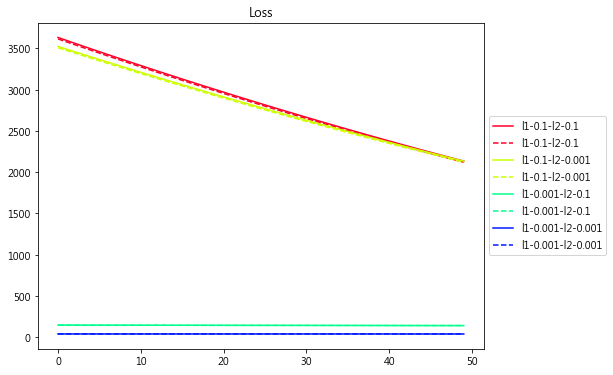

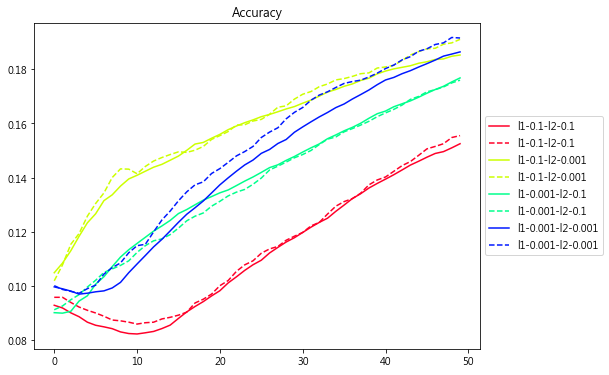

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()